In [1]:
#From SAV to LOVE

# HW7

### **Задание № 1.** Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике? Запустите детектор (SSD или Faster R-CNN) из детекторы_7.ipynb для своего изображения (любое фотореалистичное) и постройте 3 объекта, 10 объектов, 100 объектов детектора.


### **Задание № 2** Ссылка на репозиторий с полным кодом для обучения ssd нейросети - https://github.com/sergeyveneckiy/ssd-tensorflow. Попробуйте улучшить точность ее работы и напишите отчет, что вы пробовали изменить в ее параметрах и как это отражалось на процессе обучения нейронной сети. Обратите внимание! Мин. сист. требования для запуска данного проекта - это минимум 8 Gb ОЗУ. Если у вас недостаточно мощности компьютера, то вы можете просто изучить содержимое исходного кода и датасета данного проекта.

### **Задание №1**

YOLO - совершенно новый подход к обнаружению объектов.
Предыдущие работы по обнаружению объектов перепрофилируют классификаторы для выполнения обнаружения. Вместо этого мы рассматриваем обнаружение объектов как проблему регрессии для пространственно-разделенных ограничивающих рамок и вероятности ассоциированного класса. Единая нейронная сеть предсказывает ограничивающие прямоугольники и вероятности классов непосредственно из полных изображений в одной оценке.
Поскольку все обнаружение пайплайна - это единая сеть, его можно оптимизировать от начала до конца непосредственно при обнаружении. Унифицированная архитектура работает очень быстро.
Базовая модель YOLO обрабатывает изображения в реальном времени на 45 кадрах в секунду. Уменьшенная версия сети Fast YOLO, обрабатывает поразительную скорость 155 кадров в секунду, в то время как по-прежнему достигается вдвое большее значение MAP, чем у других детекторов реального времени. По сравнению с современными системами обнаружения, YOLO делает больше ошибок локализации, но с меньшей вероятностью предсказывает ложные срабатывания на фоне. Наконец, YOLO учится очень общие представления объектов. Он превосходит другие методы обнаружения, включая DPM и R-CNN, при обобщении естественных изображений на другие области, такие как произведения искусства.
источник : https://arxiv.org/pdf/1506.02640.pdf


In [9]:

# Currently %tensorflow_version 2.x installs beta1, which doesn't work here.
# %tensorflow_version can likely be used after 2.0rc0  
#!pip install tf-nightly-gpu-2.0-preview
#!pip install tf-nightly-gpu-2.0-preview
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time
%matplotlib inline

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: /device:GPU:0


In [10]:
from google.colab import files

In [11]:
import cv2 as cv

In [36]:
files.upload()

Saving 1840854.jpg to 1840854 (1).jpg


{'1840854.jpg': b'\xff\xd8\xff\xe1,4Exif\x00\x00II*\x00\x08\x00\x00\x00\x08\x00\x0f\x01\x02\x00\x05\x00\x00\x00n\x00\x00\x00\x10\x01\x02\x00\n\x00\x00\x00t\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00~\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\x86\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x002\x00\x00\x00\x8e\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc0\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xd4\x00\x00\x00j\x03\x00\x00SONY\x00\x00ILCE-7RM3\x00\xf0\x00\x00\x00\x01\x00\x00\x00\xf0\x00\x00\x00\x01\x00\x00\x00Adobe Photoshop Lightroom Classic 9.3 (Macintosh)\x002020:07:25 11:56:07\x00&\x00\x9a\x82\x05\x00\x01\x00\x00\x00\xa2\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00\xaa\x02\x00\x00"\x88\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\'\x88\x03\x00\x01\x00\x00\x00d\x00\x00\x000\x88\x03\x00\x01\x00\x00\x00\x02\x00\x00\x002\x88\x04\x00\x01\x00\x00\x00d\x00\x00\x00\x00\x90\x07\x00\x04\x00\x00\x000231\x03\x90\x02\x00\x14\x00\x00\x00\xb2\x02\x00\x00\x04\x90\x02\x00\x14\x00\

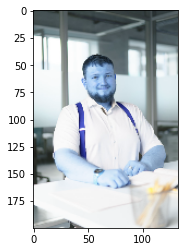

In [37]:
#Читаем картинку
im = cv.imread('/content/1840854.jpg')
    
# размеры изображения
newH = 200  #высота
newW = int(im.shape[1]*200/im.shape[0]) # ширина 
#сжатая картинка
im = cv.resize(im, (newW, newH)) 
#Выводим 

plt.imshow(im)
plt.show()

In [38]:
#Настройка модели
cv.setUseOptimized(True) #режим оптимизации
cv.setNumThreads(6)      #количество потоков

In [39]:
# Объект Selective Search Segmentation
sss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

# запускаем с картинкой
sss.setBaseImage(im)
  
# Выбираем точный метод 
sss.switchToSelectiveSearchQuality()

# Делаем selective search segmentation 
rects = sss.process() 
#вернёт массив прямоугольников, гдевозможно что-то есть
print(rects.shape) #число найденых объектов

(1341, 4)


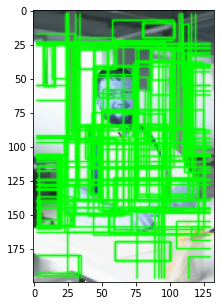

In [40]:
#Построим области

num_Rects = 150 #число выводимых region proposals (прямоугольников)

#создаем копию исходной картинки
im_ = im.copy()

for i, rect in enumerate(rects): 
  if (i < num_Rects): #пока не больше 
    # x,y - координаты левого верхнего угла; w, h - ширина и высота области
    x, y, w, h = rect
    # рисуем рамку      
    cv.rectangle(im_, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA) 
  else: 
    break 

# Рисуем на экран
plt.figure(figsize=(16,5))
plt.imshow(im_) 
plt.show()

In [34]:
files.upload()

Saving haarcascade_eye.xml to haarcascade_eye.xml
Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


{'haarcascade_eye.xml': b'<?xml version="1.0"?>\n<!--\n    Stump-based 20x20 frontal eye detector.\n    Created by Shameem Hameed (http://umich.edu/~shameem)\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain the above copyright notice,\n     this list of condi

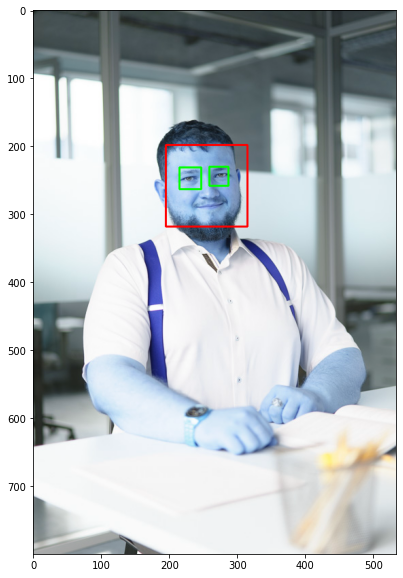

In [41]:
imf = cv.imread('/content/1840854.jpg')

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')


gray = cv.cvtColor(imf, cv.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
     cv.rectangle(imf,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = imf[y:y+h, x:x+w]

     eyes = eye_cascade.detectMultiScale(roi_gray)
     for (ex,ey,ew,eh) in eyes:
         cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure(figsize=(10,10))
plt.imshow(imf)      
plt.show()   